### PART-1 UI CREATION & LAYOUT FUNDAMENTALS

In [10]:
%%writefile 1_hello.py
import streamlit as st
st.set_page_config(page_title="hello Stramlit",page_icon='⚾',layout="wide")
st.title("Wlecome to Stramlit")
st.header("This is header")
st.subheader("THis is subheader")
st.text("st.text() is more simpled fixed width text")
st.markdown("**st.markdown()** lets you use markdown for **rich text**")

code_example="""
def add(a,b):
    return a+b
result=add(5,7)
print(result)
"""
st.code(code_example,language='python')

Overwriting 1_hello.py


In [20]:
%%writefile 2_hello.py
import streamlit as st
st.set_page_config(page_title="Faculty Profile",page_icon="👨‍🎓",layout="centered")
st.title("❄Faculty Profile Demo")
st.markdown("This is example shows how to use **Sidebar**,**Columns** and **ex**")
st.sidebar.header("Profile Setting")
faculty_name=st.sidebar.text_input("Faculty Name :",'Tejas Thakkar')
department=st.sidebar.selectbox("Department ",['CE','IT','CSE','AIML'])
experiance=st.sidebar.slider("Years of experiance",0,40,10)
st.sidebar.markdown('---')
st.sidebar.write("You can put filters,toggle etc in sidebar")

col1,col2=st.columns([1,2])
with col1:
    st.subheader("Basic info")
    st.write(f"**Name :** {faculty_name}")
    st.write(f"**Department :** {department}")
    st.write(f"**Experiance :** {experiance}")
    
with col2:
    st.subheader("ABOUT")
    st.markdown("""
    Use this area to show detailes information about the faculty member,
    such as research """)

with st.expander("show courses Handled"):
    st.write(" Python-1")
    st.write(" Python-2")
    st.write(" Digital Electronics")
    st.write(" PS")
with st.expander("Show publication "):
    st.write("1 Research Paper A(2024)")
    st.write("2 Research Paper B(2025)")

Overwriting 2_hello.py


### PART-2 INPUT WIDGETS & INTERACTIVITY
#### TEXT INPUTS

In [23]:
%%writefile 3_text_inputs.py
import streamlit as st
st.title("Text input demo")
name=st.text_input("Enter Your Name :")
comments=st.text_area("Any Comment or feedback")
st.write("**LIVE OUTPUT**")
if name:
    st.write(f"Hello :**{name}** 🖐")
if comments:
    st.write("Your Comments :")
    st.write(comments)

Overwriting 3_text_inputs.py


### Number Inputs & slider

In [25]:
%%writefile 4_number_inputs.py
import streamlit as st
st.title("Number input & slider Demo")
age=st.number_input("Enter Your Age :",min_value=0,max_value=200,value=25)
rating=st.slider("Rate this session(1-10) :",min_value=1,max_value=10,value=5)
st.write(f"Your Age is :{age}")
st.write(f"Rating :{rating}")

Overwriting 4_number_inputs.py


### Selection widgets

In [34]:
%%writefile 5_selection_widgets.py
import streamlit as st
st.title("Selection widget Demo")
course=st.selectbox("select course :",['python-1','FSD-1','PS','DE'])
preferred_days=st.multiselect(
"Preferred Days for extra lectures",['Monday','Tuesday','Wednesday','Thursday','Friday'])
delivery_mode=st.radio("Preferred Delivery Mode :",["offline","online","Hybrid"])
subscribe=st.checkbox("Subscribe to course update?")
st.write("---")
st.write(f"**Course** :{course}")
st.write(f"**Preferred Days** :{','.join(preferred_days) if preferred_days else 'none'}")
st.write(f"**Delivery Mode :** {delivery_mode}")
st.write(f"**Subscribed **:{'Yes' if subscribe else 'No'}")

Overwriting 5_selection_widgets.py


In [11]:
%%writefile 6_Notice_Board.py
import streamlit as st
from datetime import date
st.set_page_config(page_title="Notice Board",page_icon="👉",layout="wide")
st.title("Notice Board")
st.sidebar.header("Filter Notices")
selected=st.sidebar.selectbox("Notice category",['All','Exams','Workshop','Internship'])
show_past=st.sidebar.checkbox("Show Past Notices :",value=True)
notices=[
    {'title':'T4 Exam Schedule','category':'Exams','date':date(2026,1,1)},
    {'title':"Python Workshop",'category':'workshop','date':date(2026,1,5)},
    {'title':'Internship Orientation','category':'Internship','date':date(2026,1,3)}
]
st.header("Notices")
col1,col2=st.columns([1,2])
with col1:
    st.subheader("Filter Applied")
    st.write(f"category :**{selected}**")
    st.write(f"Include Pase Notices :**{show_past}**")
with col2:
    st.subheader("Information ")
    st.text("Below are notice after filtering")

for notice in notices:
    if selected!='All' and notice['category']!=selected:
        continue
    with st.expander(f'{notice['title']}{notice['category']}'):
        st.write(f"**Date**{notice['date']}")
        st.write("Notice Details")

Overwriting 6_Notice_Board.py


In [17]:
%%writefile 7_date_time_file.py
import streamlit as st
from datetime import date,time
st.title("Date, Time & File Uploader Demo")
exam_date=st.date_input("Selected Exam Date :",value=date.today())
start_time=st.time_input("Exam Start Time :",value=time(9,0))
upload_file=st.file_uploader("Upload CSV File",type=['csv'])
st.write(f"Selected Exam Date :{exam_date}")
st.write(f"Exam Start Time :{start_time}")

if upload_file is not None:
    st.success("File Uploaded Successfully")
    st.success("File Name :"+upload_file.name)
    st.success("File Type :"+upload_file.type)

Overwriting 7_date_time_file.py


In [26]:
%%writefile 8_buttom_demo.py
import streamlit as st
import pandas as pd
st.title("Button & Download Demo")
if st.button("click to generate sample demo"):
    df=pd.DataFrame({
        'Enrollment no':[1,2,3,4,5],
        'Marks':[78,85,69,92,89]
    })
    st.write("Generated Data")
    st.dataframe(df)
    csv=df.to_csv(index=False).encode('utf-8')
    st.download_button(
    label='Download as csv',data=csv,
    file_name='sample.csv',mime='text/csv')

Overwriting 8_buttom_demo.py


### Part-3 Output Display & Matplotlib Integration

In [31]:
%%writefile 9_display_data.py
import streamlit as st
import pandas as pd
st.title("Displaing Data In Streamlit")
data={
    'Student':['A','B','C','D'],
    'Marks':[85,92,76,34],
    'Passed':[True,True,True,False]
}
df=pd.DataFrame(data)
st.subheader("st.dataframe(Interactive)")
st.dataframe(df)
st.subheader("st.table(static)")
st.dataframe(df)
st.subheader("st.json(Structured JSON)")
st.json(data)

Overwriting 9_display_data.py


### Example-Media Display

In [34]:
%%writefile 10media__display.py
import streamlit as st
st.title("Media display demo")
st.subheader("Image Example :")
st.image('python.jpg',use_container_width=True)
st.subheader("VIDEO Example")
st.video('samplevideo.mp4',)
st.subheader("AUDIO Example")
st.audio('sampleaudio.mp3',)

Overwriting 10media__display.py


### Example Status Elements & Progress

In [39]:
%%writefile 11_status_demo.py
import streamlit as st
import time
st.title("Status Element Demo")
st.success("This is success massage")
st.warning("This is warning massage")
st.error("This is Error massage")
st.info("Useful information can go here")
st.write("---")
st.subheader("Progress & Spinner Example")
if st.button("start Long Task"):
    progress=st.progress(0)
    with st.spinner("Progressing..."):
        for i in range(100):
            time.sleep(0.03)
            progress.progress(i+1)
    st.success("Task completed")

Overwriting 11_status_demo.py


### Basic Matplotlib Charts

In [ ]:
# %%writefile 12_matplotlib_basic.py
import streamlit as st
import matplotlib.pyplot as plt
import numpy as np
st.title("Matplotlib + Stramlit Demo")

x=np.arange(1,11)
y=np.random.randint(50,100,size=10)

st.subheader("Line Chart(Matplotlib)")
plt.figure(figsize=(6,4))
plt.plot(x,y,marker='o')
plt.xlabel("Student Index")
plt.ylabel("Marks")
plt.title("Marks of 10 Students")
st.pyplot(plt)

plt.clf()
#--BAR CHART
st.subheader("BAR CHART")
plt.figure(figsize=(6,4))
plt.bar(x,y)
plt.xlabel("Student Index")
plt.ylabel("Marks")
plt.title("Marks Bar Chart")
st.pyplot(plt)

#--HISTOGRAM
st.subheader("HISTOGRAM")
plt.figure(figsize=(5,3))
plt.hist(y)
plt.xlabel("Student Index")
plt.ylabel("Marks")
plt.title("Marks Histogram")
st.pyplot(plt)

#--SCATTER PLOT
st.subheader("SCATTER PLOT")
plt.figure(figsize=(5,3))
plt.scatter(x,y)
plt.xlabel("Student Index")
plt.ylabel("Marks")
plt.title("Scatter Plot")
st.pyplot(plt)


### Example-13 Matplotlib Streamlit Inbuilt Graphs

In [10]:
%%writefile 13_streamlit_graph.py
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
st.title("Matplotlib Streamlit Graph Demo")
marks=np.random.randint(50,100,size=10)
attendance=np.random.randint(50,100,size=10)

chart_data=pd.DataFrame({
    "Marks":marks,
    "Attendance":attendance
})

st.subheader("Line Chart")
st.line_chart(chart_data)

st.subheader("Area Chart")
st.area_chart(chart_data)

st.subheader("Bar Chart")
counts,bins=np.histogram(marks,bins=3)
st.bar_chart(counts)

Overwriting 13_streamlit_graph.py


In [36]:
%%writefile task.py
import streamlit as st
import numpy as np
import pandas as pd

st.title("📝Student Marks & Feedback")
st.subheader("1 Student Information")
col1,col2=st.columns(2)
with col1:
    enno=st.text_input("Enrollment Number")
    student_name=st.text_input("Student Name")
with col2:
    semester=st.number_input("Semester")
    divison=st.text_input("Division")
examdate=st.date_input("Exam Date");

st.subheader("2 Marks Entry")
py1=st.number_input("Python-1 Marks(out of 100)",
min_value=0,max_value=100)
fsd=st.number_input("FSD-1 Marks(out of 100)",
min_value=0,max_value=100)
de=st.number_input("DE Marks(out of 100)",
min_value=0,max_value=100)

st.subheader("3. Feedback")
feedback=st.slider("How Well did you understand the subject",min_value=0,max_value=10)
cl_pa=participation=st.radio("Class Participation :",['LOW','Medium','High'])
add_comme=st.text_area("Additionl comments")
if st.button("Submit Record"):
    df=pd.DataFrame({'Enrollment Number':[enno],
                     'Sem':semester,
                     'Name':student_name,
                     'Div':divison,
                     'Exam Date':examdate,
                     'Python-1':py1,
                     'FSD':fsd,
                     'DE':de,
                     'Feedback':feedback,
                     'Class Participation':cl_pa,
                     'ADDITIONAL COMMENTS':add_comme
                     })
    st.dataframe(df)
    csv=df.to_csv(index=False).encode("UTF-8")
    st.download_button(label='Download',data=csv,file_name="student_data.csv",mime='text/csv')

Overwriting task.py


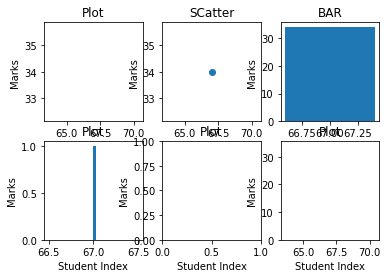

In [49]:
import matplotlib.pyplot as plt
import numpy as np
x=np.random.randint(10,90)
y=np.random.randint(10,90)

plt.subplot(2,3,1)
plt.plot(x,y)
plt.xlabel("Student Index")
plt.ylabel("Marks")
plt.title("Plot")



plt.subplot(2,3,2)
plt.scatter(x,y)
plt.xlabel("Student Index")
plt.ylabel("Marks")
plt.title("SCatter")


plt.subplot(2,3,3)
plt.bar(x,y)
plt.xlabel("Student Index")
plt.ylabel("Marks")
plt.title("BAR")

plt.subplot(2,3,4)
plt.hist(x,y)
plt.xlabel("Student Index")
plt.ylabel("Marks")
plt.title("Plot")

plt.subplot(2,3,5)
# plt.pie(y,startangle=90)
plt.xlabel("Student Index")
plt.ylabel("Marks")
plt.title("Plot")


plt.subplot(2,3,6)
plt.stackplot(x,y)
plt.xlabel("Student Index")
plt.ylabel("Marks")
plt.title("Plot")

plt.show()

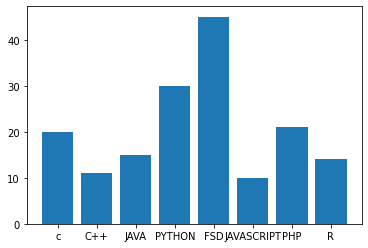

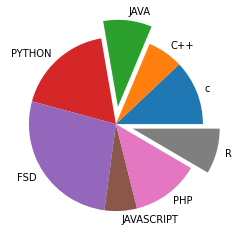

In [62]:
#wap to creat a bar plot of courses vs no of student enrolled in that course using the following dict with appropriate labels for 
#x and y and color of ther bar should be green
import matplotlib.pyplot as plt
data={"c":20,"C++":11,"JAVA":15,"PYTHON":30,"FSD":45,'JAVASCRIPT':10,'PHP':21,'R':14}
plt.bar(data.keys(),data.values())
plt.show()

plt.pie(data.values(),labels=data.keys(),explode=[0,0,0.2,0,0,0,0,0.2])
plt.show()

In [63]:
import numpy as np
arr=np.array([[[4,2,3],[6,4,5]],[[9,7,2],[1,4,7]]])
print(np.sort(arr))
print(np.sort(arr,axis=None))

[[[2 3 4]
  [4 5 6]]

 [[2 7 9]
  [1 4 7]]]
[1 2 2 3 4 4 4 5 6 7 7 9]
